# World Happiness Report 

### we need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [428]:
# import libraries
import pandas as pd
import numpy as np

In [429]:
# read data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


* here we observe our target column or label contains continous data so, it is a regression problem

* according to me country and region should not affect happiness score and we will check it in analysis phase

### Let's check blank , null , and dulpicate values

In [430]:
# checking null values
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [431]:
# checking duplicates
df.duplicated().sum()

0

In [432]:
# checking black spaces
df.loc[df['Country']==" "]
df.loc[df['Region']==" "]
df.loc[df['Happiness Rank']==" "]
df.loc[df['Happiness Score']==" "]
df.loc[df['Standard Error']==" "]
df.loc[df['Economy (GDP per Capita)']==" "]
df.loc[df['Family']==" "]
df.loc[df['Health (Life Expectancy)']==" "]
df.loc[df['Freedom']==" "]
df.loc[df['Trust (Government Corruption)']==" "]
df.loc[df['Generosity']==" "]
df.loc[df['Dystopia Residual']==" "]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


* we can observe here , there is no null, missing and duplicate value present in our dataset. Now we will move on 

In [433]:
# checking shape and info of dataset
print(df.shape)
df.info()

(158, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memor

* Here we observe the datatype of each column i.e Most columns contains float data and happiness rank contain integer data and region and country contain object data

### Let's check stats of dataset

In [434]:
df.describe()


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [435]:
df.describe(include = ['O'])

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


* Quantile range ,mean and std looks normal. we will confirm that the data is normally distributed or not and outliers in visualization part

### Let's check skweness and correlation numerically

##### lest's convert string to float

In [436]:
# importing OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [437]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df     

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [438]:
import warnings
warnings.filterwarnings('ignore')

In [439]:
# skewness
df.skew() 

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. here we can observe that data is highly skeween in [standard error,family,health,trust,generosity] . we will work on it later

In [440]:
# correlation

In [441]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

* here we can see that 'Happiness Rank' and 'Standard Error' are negatively correlation to happiness score and other columns are positively correlated 

### Let's check skweness, correlation and outliers graphically

In [442]:
import seaborn as sns
import matplotlib.pyplot as plt

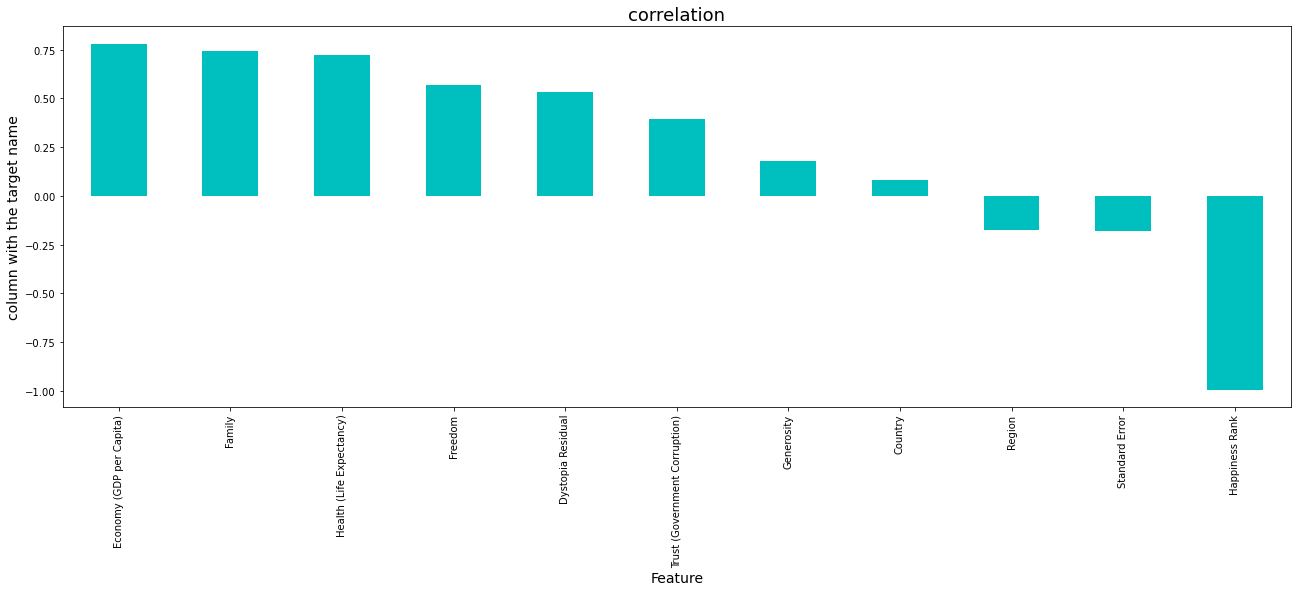

In [443]:
# checking correlation
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with the target name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


* Here we can see that 'Happiness Rank' and 'Standard Error' are negatively correlation to happiness score and other columns are positively correlated

<AxesSubplot:>

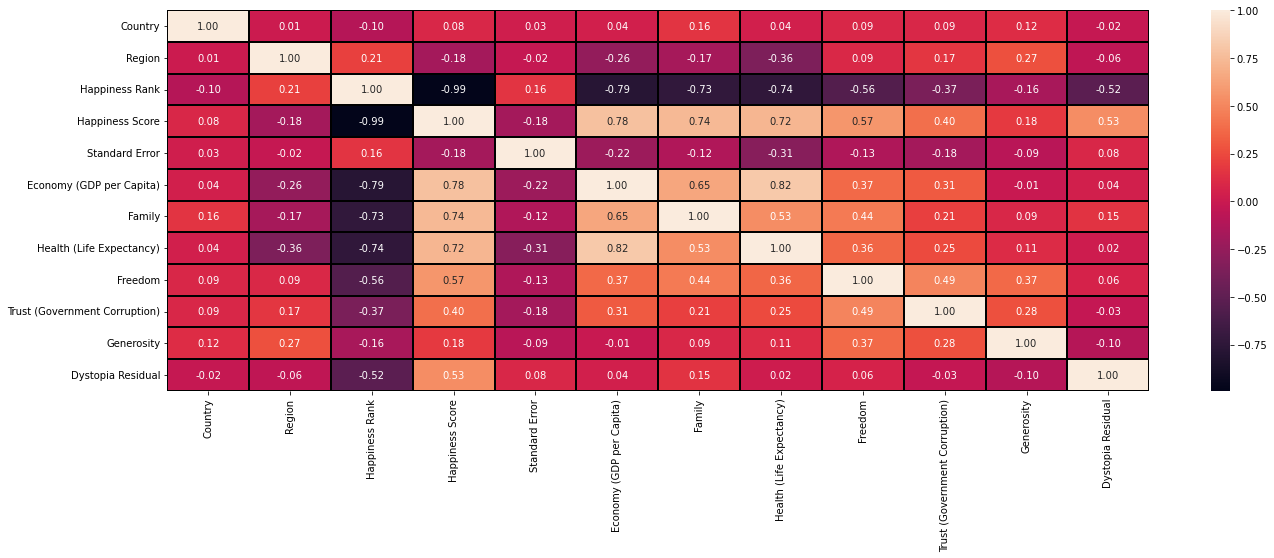

In [444]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

* here we can see 'happiness rank' is correlated to to correlated to many columns so it is a problem of multiple correlation we will work on it later

135.0    1
10.0     1
51.0     1
77.0     1
57.0     1
        ..
70.0     1
125.0    1
81.0     1
101.0    1
141.0    1
Name: Country, Length: 158, dtype: int64


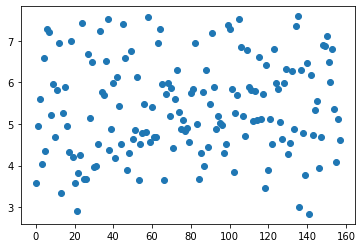

In [445]:
ax = plt.scatter(x="Country",y='Happiness Score',data=df)
print(df["Country"].value_counts())

8.0    40
1.0    29
3.0    22
9.0    21
4.0    20
6.0     9
7.0     7
2.0     6
5.0     2
0.0     2
Name: Region, dtype: int64


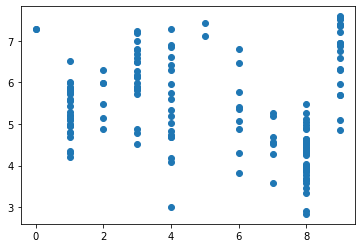

In [446]:
ax = plt.scatter(x="Region",y='Happiness Score',data=df)
print(df["Region"].value_counts())

* here we observe 'region' is following any pattern and 'county' is following a pattern it means it is related to 'happiness score'

<AxesSubplot:xlabel='Country', ylabel='Density'>

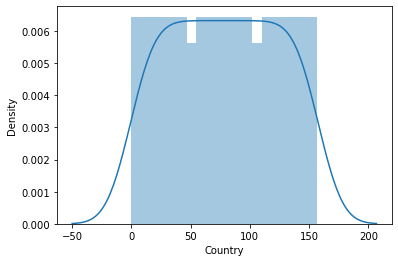

In [447]:
# let's check skewness
sns.distplot(df['Country'], bins=20)

<AxesSubplot:xlabel='Region', ylabel='Density'>

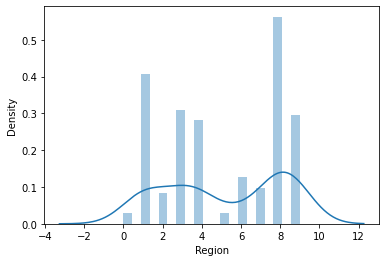

In [448]:
sns.distplot(df['Region'], bins=20)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

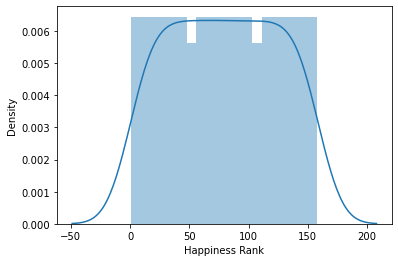

In [449]:
sns.distplot(df['Happiness Rank'],bins=20)

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

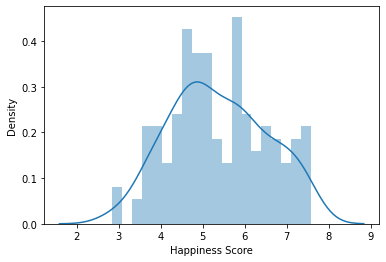

In [450]:
sns.distplot(df['Happiness Score'],bins=20)

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

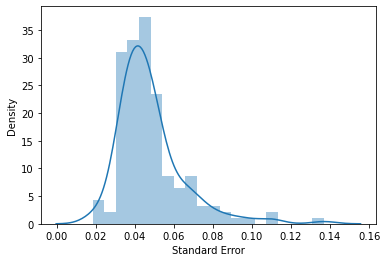

In [451]:
sns.distplot(df['Standard Error'],bins=20)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

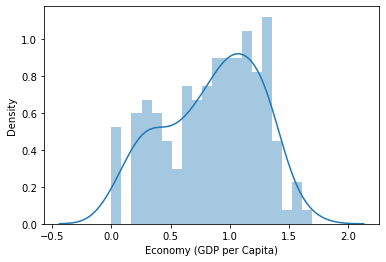

In [452]:
sns.distplot(df['Economy (GDP per Capita)'],bins=20)

<AxesSubplot:xlabel='Family', ylabel='Density'>

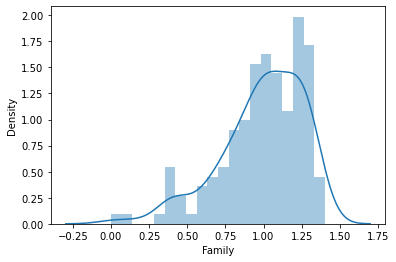

In [453]:
sns.distplot(df['Family'],bins=20)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

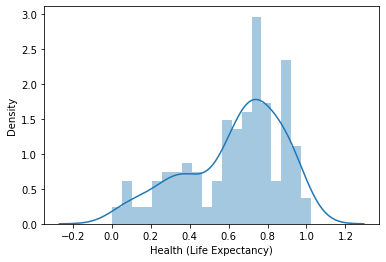

In [454]:
sns.distplot(df['Health (Life Expectancy)'],bins=20)

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

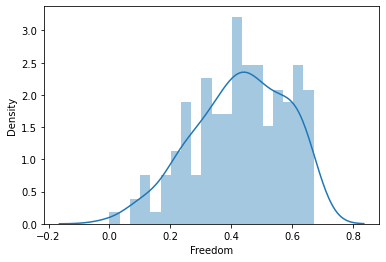

In [455]:
sns.distplot(df['Freedom'],bins=20)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

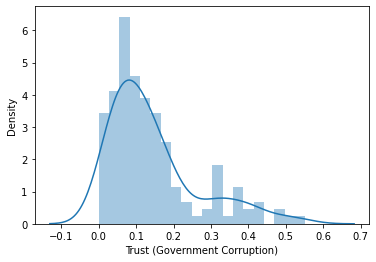

In [456]:
sns.distplot(df['Trust (Government Corruption)'],bins=20) 

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

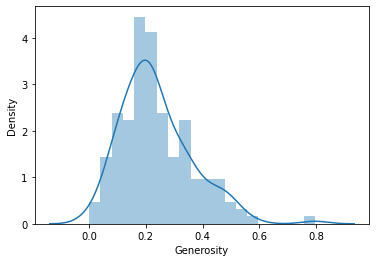

In [457]:
sns.distplot(df['Generosity'],bins=20) 

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

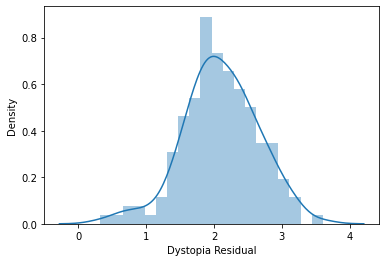

In [458]:
sns.distplot(df['Dystopia Residual'],bins=20) 

* here we can see data in not normally distributed in every column except 'dystopia','Happiness Rank' and 'Country'. we will work on it later

In [459]:
# checking outliers

In [460]:
collist = df.columns.values
ncols = 30
nrows = 14

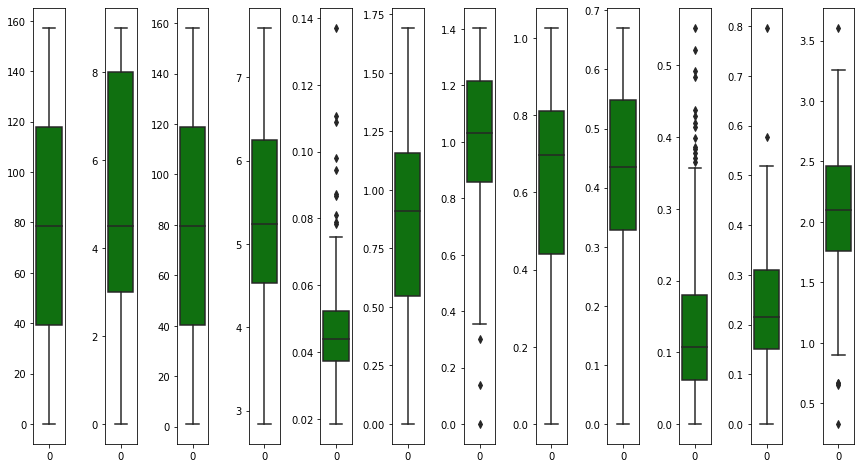

In [461]:
plt.figure(figsize=(ncols,3*ncols))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data = df[collist[i]],color="green",orient="v")
    plt.tight_layout()

In [462]:
collist

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

* we can see easily that outliers are present in columns'Standard Error','Family''Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'. so, we will remove them

### Let's work on data cleaning

In [463]:
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [464]:
df = df.drop(['Country', 'Region','Happiness Rank','Standard Error'],axis=1)

In [465]:
df.corr()['Happiness Score'].sort_values()

Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

* i am removing these row because of correlation problem

#### removing outlier 

In [466]:
df.shape

(158, 8)

In [467]:
df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


we know that we have outliers in columns 'Standard Error','Family''Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'. so, we will remove them

In [468]:
min_fam, max_fam = df.Family.quantile([0.05, 0.99])
min_fam, max_fam

(0.41560600000000003, 1.364407)

In [469]:
min_tru, max_tru = df['Trust (Government Corruption)'].quantile([0.01, 0.84])
min_tru, max_tru

(0.0046754000000000006, 0.2548287999999999)

In [470]:
min_gen, max_gen = df.Generosity.quantile([0.001, 0.922])
min_gen, max_gen

(0.00031243, 0.4527447400000004)

In [471]:
min_dy, max_dy = df['Dystopia Residual'].quantile([0.01, 0.99])
min_dy, max_dy

(0.6634841, 3.2208510000000006)

In [472]:
df_n = df[(df.Family<max_fam)&(df.Family>min_fam)]

In [473]:
df_n= df_n[(df['Trust (Government Corruption)']<max_tru)&(df['Trust (Government Corruption)']>min_tru)]

In [474]:
df_n= df_n[(df['Dystopia Residual']<max_dy)&(df['Dystopia Residual']>min_dy)]

In [475]:
df_n= df_n[(df['Generosity']<max_gen)&(df['Generosity']>min_gen)]

<AxesSubplot:xlabel='Trust (Government Corruption)'>

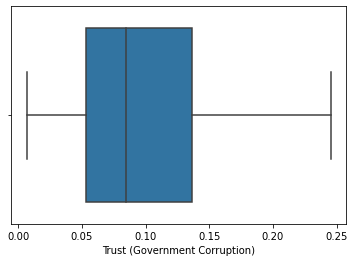

In [476]:
sns.boxplot(x=df_n['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Family'>

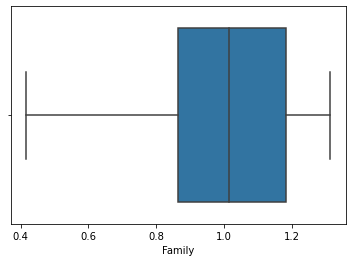

In [477]:
sns.boxplot(x=df_n['Family'])

<AxesSubplot:xlabel='Dystopia Residual'>

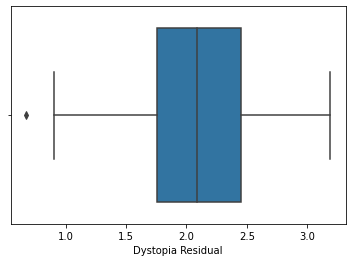

In [478]:
sns.boxplot(x=df_n['Dystopia Residual'])

<AxesSubplot:xlabel='Generosity'>

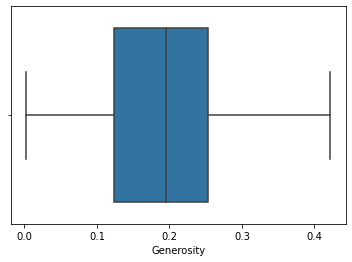

In [479]:
sns.boxplot(x=df_n['Generosity'])

In [480]:
df_n.shape

(113, 8)

* we can see here that outliers are removed . 

##### now we will work on skewness

In [481]:
df_n.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,5.199381,0.798441,0.996842,0.603797,0.401255,0.096096,0.201635,2.101336
std,0.952475,0.358416,0.211932,0.246142,0.135825,0.056858,0.090954,0.526299
min,2.905000,0.000000,0.415870,0.000000,0.000000,0.006490,0.001990,0.671080
25%,4.517000,0.521070,0.864490,0.414350,0.317510,0.053270,0.123440,1.758730
50%,5.123000,0.881800,1.014040,0.669260,0.408200,0.084840,0.195910,2.090660
75%,5.855000,1.082540,1.183540,0.773610,0.504420,0.136330,0.253280,2.453730
max,7.278000,1.394510,1.313790,0.991110,0.662460,0.245580,0.421920,3.191310


In [482]:
df_n.shape

(113, 8)

spliting data into features and target 

In [483]:
x=df_n.iloc[ : , 1:8]
y=df_n.iloc[ : , 0]

In [484]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
10,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
14,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
18,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,2.41484
...,...,...,...,...,...,...,...
148,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [485]:
y

10     7.278
11     7.226
12     7.200
14     7.119
18     6.937
       ...  
148    3.667
149    3.656
150    3.655
151    3.587
156    2.905
Name: Happiness Score, Length: 113, dtype: float64

In [486]:
df_n.skew()

Happiness Score                  0.148971
Economy (GDP per Capita)        -0.477135
Family                          -0.585385
Health (Life Expectancy)        -0.711084
Freedom                         -0.307552
Trust (Government Corruption)    0.545617
Generosity                       0.353770
Dystopia Residual               -0.075902
dtype: float64

In [487]:
from sklearn.preprocessing import power_transform

In [488]:
x=power_transform(x,method='yeo-johnson')

In [489]:
x

array([[ 1.30880284e+00,  1.15490454e+00,  1.50036067e+00,
         3.22094220e-02, -2.13943871e-01,  1.38276123e+00,
         1.91218867e+00],
       [ 3.73957841e-01,  1.24328315e+00,  1.16759491e+00,
         1.85856773e+00,  3.05649478e-01,  6.42125299e-01,
         2.08816132e+00],
       [ 1.71655635e+00,  1.63182009e+00,  1.35234432e+00,
         1.77406294e+00,  1.48118947e+00,  1.37510630e+00,
         8.22209381e-01],
       [ 1.93963786e+00,  1.30243213e+00,  1.17676082e+00,
         1.09475386e+00,  1.12373271e+00,  1.98368553e+00,
         7.77332756e-01],
       [ 1.60419976e+00,  1.55533539e+00,  1.39142204e+00,
         1.42350690e+00,  1.91056031e+00,  3.01519309e-01,
         5.92564837e-01],
       [ 6.63216174e-01,  1.35965244e+00,  3.89872739e-01,
         1.53371458e-01,  3.89132711e-01, -1.73062257e+00,
         2.11602627e+00],
       [ 7.28062097e-01,  9.96919963e-01,  7.97581093e-01,
         1.06161401e+00,  7.03719119e-02,  5.32526539e-01,
         1.4385741

In [490]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.30880284e+00,  1.15490454e+00,  1.50036067e+00,
         3.22094220e-02, -2.13943871e-01,  1.38276123e+00,
         1.91218867e+00],
       [ 3.73957841e-01,  1.24328315e+00,  1.16759491e+00,
         1.85856773e+00,  3.05649478e-01,  6.42125299e-01,
         2.08816132e+00],
       [ 1.71655635e+00,  1.63182009e+00,  1.35234432e+00,
         1.77406294e+00,  1.48118947e+00,  1.37510630e+00,
         8.22209381e-01],
       [ 1.93963786e+00,  1.30243213e+00,  1.17676082e+00,
         1.09475386e+00,  1.12373271e+00,  1.98368553e+00,
         7.77332756e-01],
       [ 1.60419976e+00,  1.55533539e+00,  1.39142204e+00,
         1.42350690e+00,  1.91056031e+00,  3.01519309e-01,
         5.92564837e-01],
       [ 6.63216174e-01,  1.35965244e+00,  3.89872739e-01,
         1.53371458e-01,  3.89132711e-01, -1.73062257e+00,
         2.11602627e+00],
       [ 7.28062097e-01,  9.96919963e-01,  7.97581093e-01,
         1.06161401e+00,  7.03719119e-02,  5.32526539e-01,
         1.4385741

In [491]:
x.mean()

2.2457102900129587e-17

In [492]:
x.std()

1.0

In [493]:
x_data = pd.DataFrame(x,columns = ['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual'])

In [494]:
x_data

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.308803,1.154905,1.500361,0.032209,-0.213944,1.382761,1.912189
1,0.373958,1.243283,1.167595,1.858568,0.305649,0.642125,2.088161
2,1.716556,1.631820,1.352344,1.774063,1.481189,1.375106,0.822209
3,1.939638,1.302432,1.176761,1.094754,1.123733,1.983686,0.777333
4,1.604200,1.555335,1.391422,1.423507,1.910560,0.301519,0.592565
...,...,...,...,...,...,...,...
108,-1.268333,-1.144766,-1.639159,-1.217612,-0.744505,-0.127531,-0.312748
109,-1.606963,-2.063150,-1.423944,-0.235936,0.566427,0.957499,-0.219997
110,-0.989163,-1.104970,-1.635292,0.462151,1.388728,0.073347,-1.299906
111,-1.443380,-0.782104,-1.341353,-0.105048,0.676674,0.247171,-1.211351


In [495]:
y_data = y

In [496]:
y_data

10     7.278
11     7.226
12     7.200
14     7.119
18     6.937
       ...  
148    3.667
149    3.656
150    3.655
151    3.587
156    2.905
Name: Happiness Score, Length: 113, dtype: float64

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

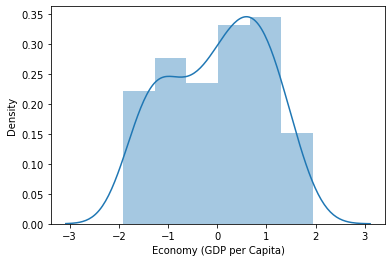

In [497]:
sns.distplot(x_data['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

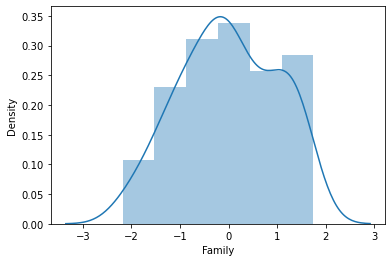

In [498]:
sns.distplot(x_data['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

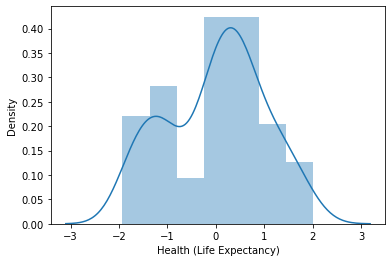

In [499]:
sns.distplot(x_data['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

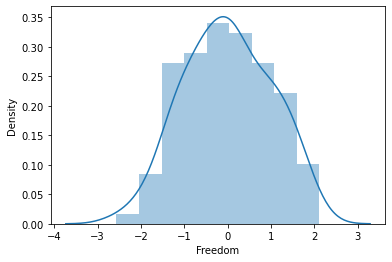

In [500]:
sns.distplot(x_data['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

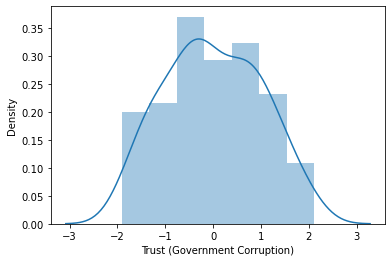

In [501]:
sns.distplot(x_data['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

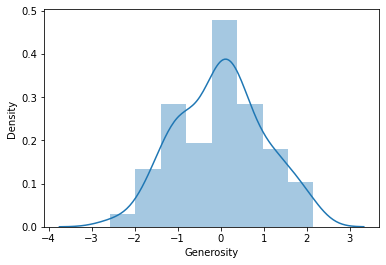

In [502]:
sns.distplot(x_data['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

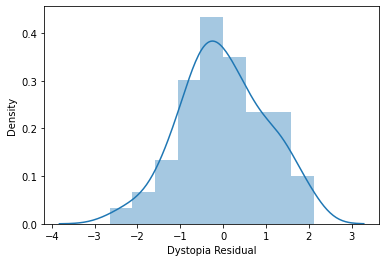

In [503]:
sns.distplot(x_data['Dystopia Residual'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

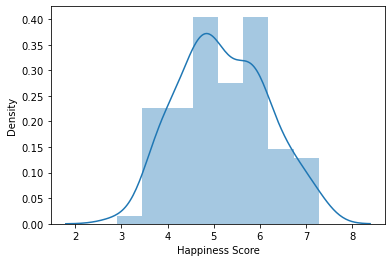

In [504]:
sns.distplot(y)

In [505]:
y_data=np.sqrt(y_data)

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

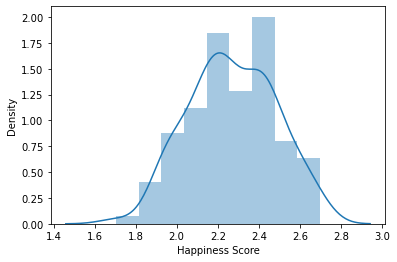

In [506]:
sns.distplot(y_data)

* we can see clearly skewness of data is removed

### let's move to model building and training process

In [507]:
feature = x_data  
target = y_data

In [508]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [509]:
for i in range(0,100):
    feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.2,random_state=i)
    lr.fit(feature_train,target_train)
    pred_train=lr.predict(feature_train)
    pred_test=lr.predict(feature_test)
    print(f"at random state {i},the training accuracy is : ,{r2_score(target_train,pred_train)}")
    print(f"at random state {i},the testing accuracy is : ,{r2_score(target_test,pred_test)}")
    print("\n")

at random state 0,the training accuracy is : ,0.9857362977687897
at random state 0,the testing accuracy is : ,0.9891823999100436


at random state 1,the training accuracy is : ,0.9857914792840267
at random state 1,the testing accuracy is : ,0.9873476074559303


at random state 2,the training accuracy is : ,0.9866174490625549
at random state 2,the testing accuracy is : ,0.9749362970419376


at random state 3,the training accuracy is : ,0.9846214323508471
at random state 3,the testing accuracy is : ,0.9917274326614992


at random state 4,the training accuracy is : ,0.985822292509041
at random state 4,the testing accuracy is : ,0.9883023061981486


at random state 5,the training accuracy is : ,0.9862899721479501
at random state 5,the testing accuracy is : ,0.9879740339158838


at random state 6,the training accuracy is : ,0.9865235955267287
at random state 6,the testing accuracy is : ,0.9862745430932378


at random state 7,the training accuracy is : ,0.9854933621491546
at random state 7,t

* I will select random state 1 as the difference between test and train accuracy is minimum

In [510]:
feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.2,random_state=1)

In [511]:
lr.fit(feature_train,target_train)

LinearRegression()

In [512]:
 pred_train=lr.predict(feature_train)

In [513]:
print(r2_score(target_train,pred_train))

0.9857914792840267


* Now, we get R2-score 0.9857914792840267 using LinearRegression model, which is very good

### now we will do cross-validation of the model

In [514]:
train_accuracy=r2_score(target_train,pred_train)
test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,feature,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} cv score is {cv_mean} and accuracy score of taining is {train_accuracy} and accuracy score of testing is {test_accuracy}")
    print('\n')

at cross fold 2 cv score is 0.6332908440654919 and accuracy score of taining is 0.9857914792840267 and accuracy score of testing is -1.531920757685358


at cross fold 3 cv score is 0.6648420898539519 and accuracy score of taining is 0.9857914792840267 and accuracy score of testing is -1.531920757685358


at cross fold 4 cv score is 0.6422358293798329 and accuracy score of taining is 0.9857914792840267 and accuracy score of testing is -1.531920757685358


at cross fold 5 cv score is 0.42567158184502657 and accuracy score of taining is 0.9857914792840267 and accuracy score of testing is -1.531920757685358


at cross fold 6 cv score is 0.3416286219620524 and accuracy score of taining is 0.9857914792840267 and accuracy score of testing is -1.531920757685358


at cross fold 7 cv score is 0.17989704528318481 and accuracy score of taining is 0.9857914792840267 and accuracy score of testing is -1.531920757685358


at cross fold 8 cv score is 0.03023618066567678 and accuracy score of taining is

* since number of flod dont have much impact on accurary and cv_score so we select cv=3

#####  over and under fitting

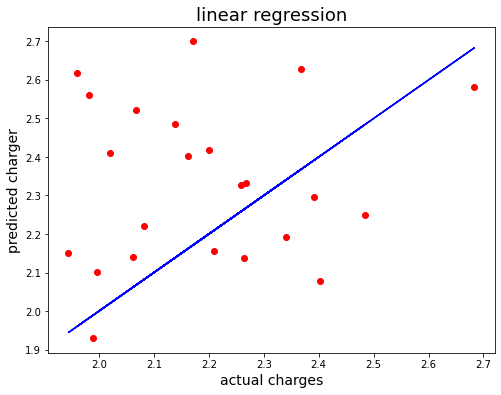

In [515]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('actual charges',fontsize=14)
plt.ylabel('predicted charger',fontsize=14)
plt.title('linear regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

In [516]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [517]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],
             'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(feature_train,target_train)

print(clf.best_params_)


{'alpha': 0.0001, 'random_state': 0}


* final model training

In [520]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(feature_train,target_train)
ls_score_training=ls.score(feature_train,target_train)
pred_ls=ls.predict(feature_test)
ls_score_training*100

98.57904879830686

In [521]:
pred_ls=ls.predict(feature_test)

In [522]:
lss=r2_score(target_test,pred_ls)
lss*100

98.73342097828156

In [531]:
cv_score=cross_val_score(ls,feature,target,cv=3)
cv_mean=cv_score.mean()
cv_mean*100

66.83653411585783

In [532]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion' :['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(feature_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [534]:
rf = RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(feature_train,target_train)
rf.score(feature_train,target_train)
pred_decision = rf.predict(feature_test)

rfs = r2_score(target_test,pred_decision)
print("R2 score : ",rfs*100)

rfscore = cross_val_score(rf,feature,target,cv=3)
rfc = rfscore.mean()
print('cross val score : ',rfc*100)

R2 score :  79.45530091583177
cross val score :  -281.93249525130864


* saving the model

In [535]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf, open(filename,'wb'))

##### conclusion

* we will go with linear regression as it give maximum accuracy